In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Telecom_customer_churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

There are 7043 row and 21 columns

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
df['TotalCharges']=df['TotalCharges'].replace(" ",np.nan)

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

total charges has shown in object dtypes but it has continious dtypes

In [9]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
df['TotalCharges']=df['TotalCharges'].astype(float)

In [11]:
df['TotalCharges']=df['TotalCharges'].fillna( df['TotalCharges'].mean())

In [12]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Now we have converted our nan values in float dtypes

In [13]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Male      3555
Female    3488
Name: gender, dtype: int64


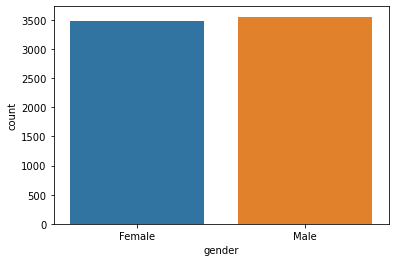

In [14]:
sns.countplot(x='gender',data=df)
print(df['gender'].value_counts())

The total number of male custome is 3555 and female customer is 3488

No     3641
Yes    3402
Name: Partner, dtype: int64


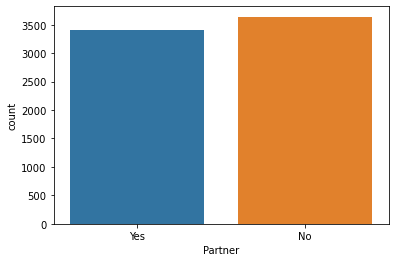

In [15]:
sns.countplot(x='Partner',data=df)
print(df['Partner'].value_counts())

There a more unmarried customer than married

No     4933
Yes    2110
Name: Dependents, dtype: int64


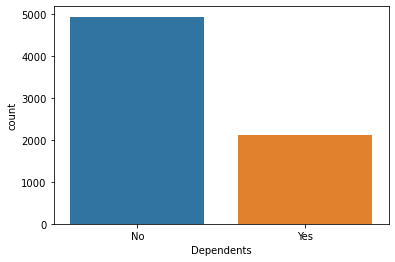

In [16]:
sns.countplot(x='Dependents',data=df)
print(df['Dependents'].value_counts())

The total number of dependents customer is 2110 and undependent is 4933

Yes    6361
No      682
Name: PhoneService, dtype: int64


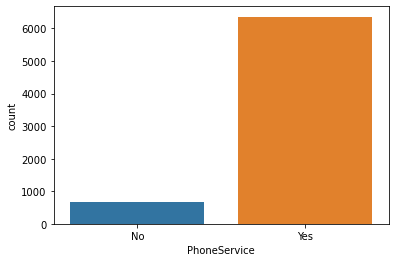

In [17]:
sns.countplot(x='PhoneService',data=df)
print(df['PhoneService'].value_counts())

The above observation show us people mostly used phone service

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


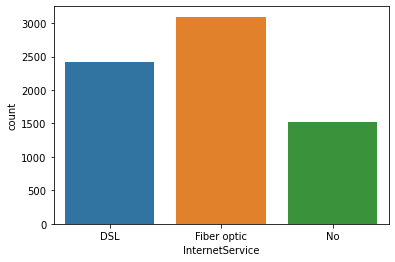

In [18]:
sns.countplot(x='InternetService',data=df)
print(df['InternetService'].value_counts())

There are 1526 customer which they don't use any service mostly people using Fiber optic

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


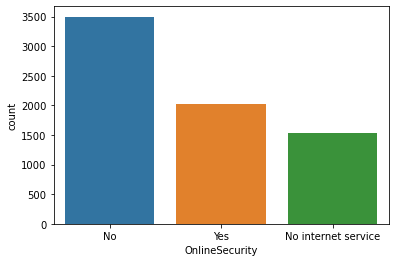

In [19]:
sns.countplot(x='OnlineSecurity',data=df)
print(df['OnlineSecurity'].value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64


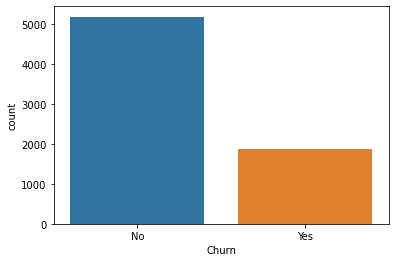

In [20]:
sns.countplot(x='Churn',data=df)
print(df['Churn'].value_counts())

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

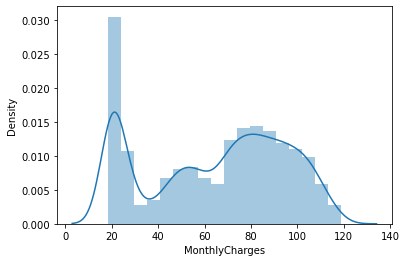

In [21]:
sns.distplot(df['MonthlyCharges'],kde=True)

In dataset we have categorical data so we will convert in numerical by using encoder

In [22]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [23]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))   

In [24]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,3367.0,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder

In [26]:
le=LabelEncoder()
le.fit_transform(df['TotalCharges'])

array([  74, 3624,  536, ..., 1265, 1157, 6151], dtype=int64)

In [27]:
df.dtypes

customerID          float64
gender              float64
SeniorCitizen         int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
dtype: object

We have successfully convert our object dtype into float

In [28]:
df.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,-0.000270,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309


Lets visualize it which will be easy to understand

<AxesSubplot:>

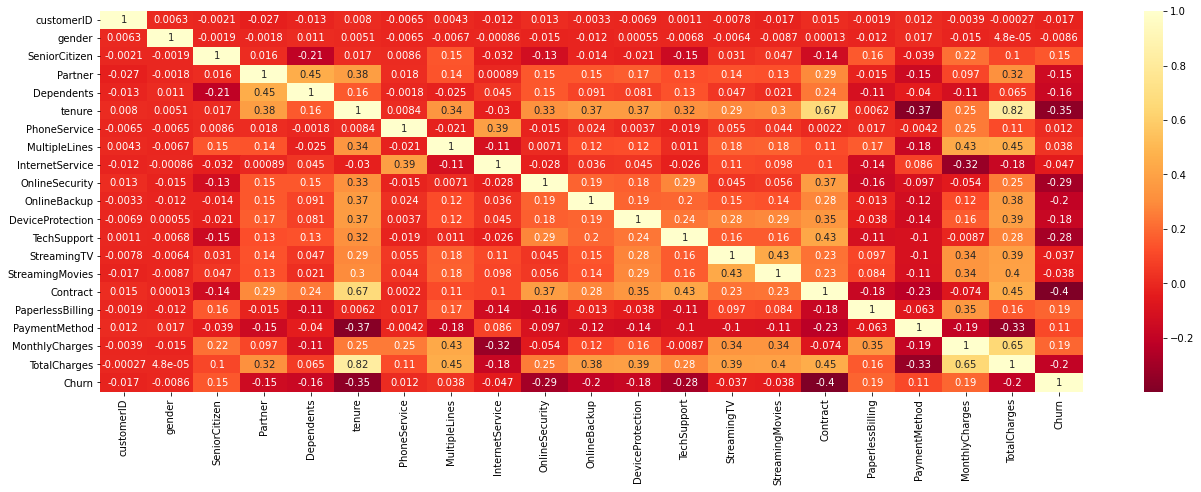

In [29]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),cmap='YlOrRd_r',annot=True)

In [30]:
df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

From above observation there is no skewness in the dataset so we will not treat it

customerID             AxesSubplot(0.125,0.816017;0.065678x0.0639831)
gender              AxesSubplot(0.203814,0.816017;0.065678x0.0639831)
SeniorCitizen       AxesSubplot(0.282627,0.816017;0.065678x0.0639831)
Partner             AxesSubplot(0.361441,0.816017;0.065678x0.0639831)
Dependents          AxesSubplot(0.440254,0.816017;0.065678x0.0639831)
tenure              AxesSubplot(0.519068,0.816017;0.065678x0.0639831)
PhoneService        AxesSubplot(0.597881,0.816017;0.065678x0.0639831)
MultipleLines       AxesSubplot(0.676695,0.816017;0.065678x0.0639831)
InternetService     AxesSubplot(0.755508,0.816017;0.065678x0.0639831)
OnlineSecurity      AxesSubplot(0.834322,0.816017;0.065678x0.0639831)
OnlineBackup           AxesSubplot(0.125,0.739237;0.065678x0.0639831)
DeviceProtection    AxesSubplot(0.203814,0.739237;0.065678x0.0639831)
TechSupport         AxesSubplot(0.282627,0.739237;0.065678x0.0639831)
StreamingTV         AxesSubplot(0.361441,0.739237;0.065678x0.0639831)
StreamingMovies     

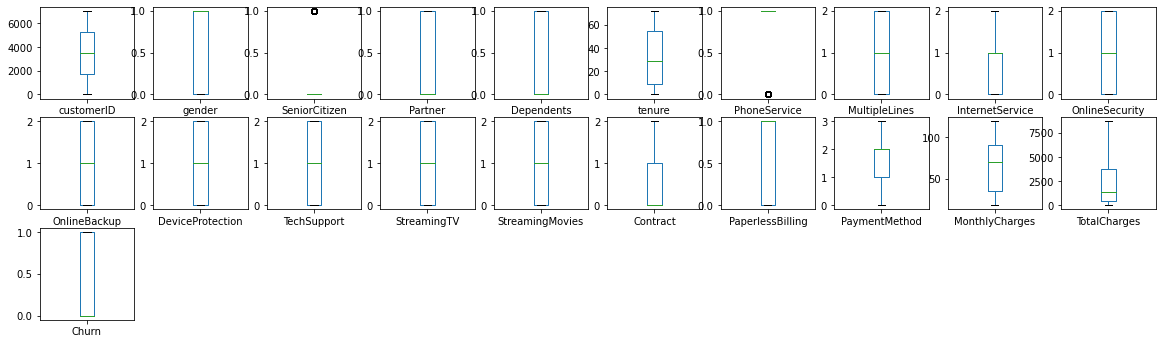

In [31]:
df.plot(kind='box',subplots=True,layout=(10,10),figsize=(20,20))

As we can see there is no outlier in dataset so we will not remove it

Lets train and test our model

In [32]:
x=df.drop('TotalCharges',axis=1)
y=df['TotalCharges']

In [33]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=35)

In [35]:
lr.fit(x_train,y_train)

LinearRegression()

In [36]:
pred_test=lr.predict(x_test)

In [37]:
print(r2_score(y_test,pred_test))

0.905903201158931


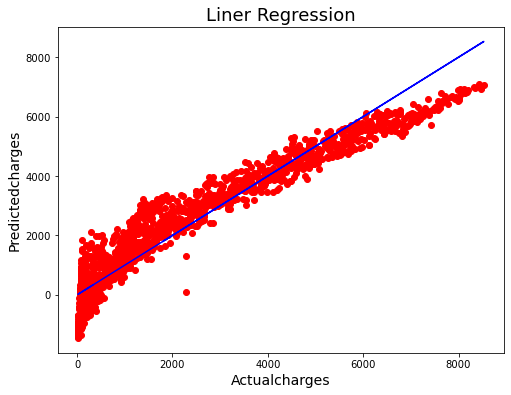

In [38]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actualcharges',fontsize=14)
plt.ylabel('Predictedcharges',fontsize=14)
plt.title('Liner Regression',fontsize=18)
plt.show()

Best fit line is covering most of the datapoints which shows good fit to our model

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [40]:
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [41]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.9059307573838347

In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
cv_score=cross_val_score(ls,x,y,cv=5,scoring="r2")
cv_mean=cv_score.mean()
cv_mean

0.9036629382160928

# Hyper parameter tuning

In [44]:
parameters={'fit_intercept':[True,False],
           'normalize':[True,False],
           'positive':[True,False]}

In [45]:
lr=LinearRegression()
GCV=GridSearchCV(lr,parameters)
GCV.fit(x_train,y_train)
print(GCV.best_params_)

{'fit_intercept': True, 'normalize': True, 'positive': False}


In [46]:
lg=LinearRegression(fit_intercept=True,normalize=True,positive=False)
lg.fit(x_train,y_train)
lg.score(x_train,y_train)
pred_decision=lg.predict(x_test)

In [47]:
lg=r2_score(y_test,pred_decision)
print('R2 Score:',lg*100)

R2 Score: 90.59032011589312


After hyper parameter tuning we get alomost 91% accuracy

Lets use Ensemble technique

# Ensemble Technique

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
GCV=GridSearchCV(rf,parameters)
GCV.fit(x_train,y_train)
print(GCV.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [50]:
rf=RandomForestRegressor(criterion='mae',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

In [51]:
rfs=r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)

R2 Score: 99.87834303143508


In [52]:
rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score',rfs*100)

Cross Val Score 99.87834303143508


# We are getting model accuracy and cross validation both 99% which shows our model is performing extremely well

# MODEL SAVING

In [53]:
import pickle

In [54]:
filename='Telecom_customer_churn.cs.pkl'
pickle.dump(rf,open(filename,'wb'))

In [55]:
import joblib

In [56]:
joblib.dump(rfs,'loan_prediction.csv2.pkl')

['loan_prediction.csv2.pkl']

# Observations

* There were null value in target column Total monthly charges which were hidden replace it with mean value 

* Total monthly charges shown object dtypes which was float type 

* Use Label and ordinal encoder for converting categorical data into numerical

* No skewness in dataset so not treat it

* Check outlier with boxplot as shown in the above figure no outlier spotted 

* Use only one model becasue Linear regression was best fit for the data for model building

* Use Hyper tuning on Linear Regression model 

* Best fit line is covering most of the datapoints which shows good fit to our model

* Use Ensemble technique Random forest Regressor

* Model Saving